In [1]:
# TODO:


In [2]:
# Imports
import matplotlib
import os
import pandas
import IPython

In [3]:
# Read in data
entities = pandas.read_csv('data/entities.csv')
movies   = pandas.read_csv('data/movies.csv')

In [4]:
entities = entities.merge(movies[['imdb_id', 'title', 'release_year']])

### release_year vs. release_date.year

In [5]:
def convert_release_date(x):
    try:
        return pandas.to_datetime(x)
    except:
        print(x)
        return None
movies['release_date_2'] = movies['release_date'].apply(convert_release_date)
movies['release_year_2'] = movies['release_date_2'].dt.year    

In [6]:
# release_year: initial release 
# release_date: date of release in USA
# Seems like the USA release year is the year that the movie will be considered for Oscars.
# However, IMDB data does not seem consistent. See: The Hurt Locker & Frost/Nixon, for Best Picture.
IPython.core.display.display(movies[movies['release_year'] != movies['release_year_2']].shape)
IPython.core.display.display(movies[movies['release_year'] != movies['release_year_2']].tail())

(36, 9)

,imdb_id,title,release_year,release_date,duration,mpaa_rating,locations,release_date_2,release_year_2
447,tt1899353,The Raid: Redemption,2011,13 April 2012,1h 41min,R,Indonesia,2012-04-13,2012.0
456,tt2034800,The Great Wall,2016,17 February 2017,1h 43min,PG-13,"Qingdao, China",2017-02-17,2017.0
490,tt2802144,Kingsman: The Secret Service,2014,13 February 2015,2h 9min,R,"Sharpthorne tunnel, Bluebell Railway, West Sus...",2015-02-13,2015.0
527,tt5996252,Trader,1987,NaN,55min,NaN,NaN,NaT,NaN
528,tt6540078,The Child in Time,2017,1 April 2018,1h 22min,NOT RATED,"England, UK",2018-04-01,2018.0


### Plots

In [7]:
file = open('README.md', 'w')
file.write('#### Distribution by release year\n')
file.write('![release_years](png/release_years.png)\n')
file.write('\n')

1

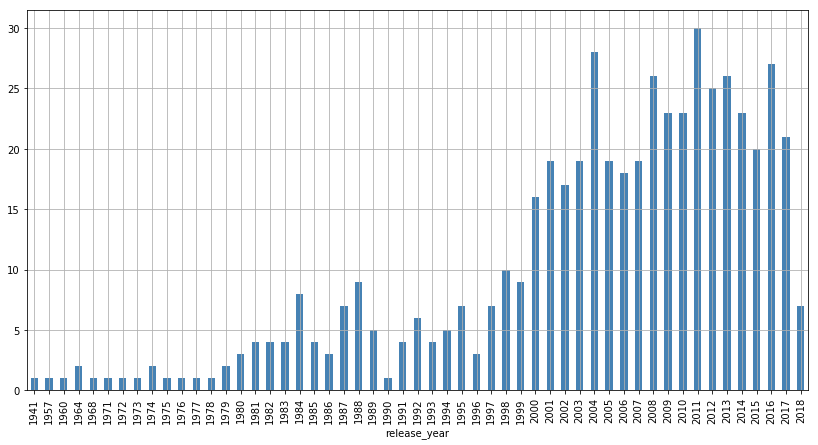

In [8]:
counts_by_release_year = movies.groupby('release_year').count()['imdb_id']
counts_by_release_year.plot.bar(figsize=(14,7), color='steelblue', grid=True)
matplotlib.pyplot.savefig('png/release_years.png')
matplotlib.pyplot.show()

In [9]:
# plot by country?

### Stats

In [10]:
def df_to_md(df):
    df = df.reset_index()
    dashes = ['---' for i in range(len(df.columns))]
    dashes = pandas.DataFrame([dashes], columns=df.columns)
    formatted = pandas.concat([dashes, df])
    return formatted.to_csv(sep='|', index=False)

In [11]:
# Most prevalent people
roles = entities.query("entity_type in ('director', 'writer', 'actor')")
roles = roles[['entity_name', 'entity_type']].drop_duplicates()
roles = roles.groupby('entity_name')['entity_type'].apply(lambda x: ', '.join(x))
roles = roles.rename('roles').to_frame()
people = entities.query("entity_type in ('director', 'writer', 'actor')") \
                 .groupby('entity_name').count()['imdb_id'] \
                 .rename('count').to_frame().join(roles) \
                 .sort_values('count', ascending=False).head()
people = people.reset_index()[['entity_name', 'roles', 'count']]
people.columns = ['name', 'roles', 'count']
people = people.set_index('name')
people

,roles,count
name,,
Quentin Tarantino,"actor, director, writer",18
Seth Rogen,"actor, writer, director",17
Samuel L. Jackson,actor,17
Jackie Chan,"actor, director, writer",15
Christopher Nolan,"director, writer",15


In [12]:
file.write('#### Most watched people\n')
text = df_to_md(people)
file.write(text)
file.write('\n')

1

In [13]:
# My most-watched directors
directors = entities.query("entity_type == 'director'") \
                    .groupby('entity_name').count()['imdb_id'] \
                    .sort_values(ascending=False).head().to_frame()
directors

,imdb_id
entity_name,
Steven Spielberg,12
Christopher Nolan,8
Peter Jackson,7
Quentin Tarantino,7
Ridley Scott,6


In [14]:
file.write('#### Most watched directors\n')
text = df_to_md(directors)
file.write(text)
file.write('\n')

1

In [15]:
# My most-watched writers
writers = entities.query("entity_type == 'writer'") \
                  .groupby('entity_name').count()['imdb_id'] \
                  .sort_values(ascending=False).head().to_frame()
writers

,imdb_id
entity_name,
Quentin Tarantino,10
George Lucas,8
Andrew Stanton,8
David S. Goyer,7
Gary Scott Thompson,7


In [16]:
file.write('#### Most watched writers\n')
text = df_to_md(writers)
file.write(text)
file.write('\n')

1

In [17]:
# My most-watched actors
actors = entities.query("entity_type == 'actor'") \
                 .groupby('entity_name').count()['imdb_id'] \
                 .sort_values(ascending=False).head().to_frame()
actors

,imdb_id
entity_name,
Samuel L. Jackson,17
Vin Diesel,13
Jonah Hill,13
Jackie Chan,13
Seth Rogen,13


In [18]:
file.write('#### Most watched actors\n')
text = df_to_md(directors)
file.write(text)
file.write('\n')

1

In [19]:
# My most-watched studios
studios = entities.query("entity_type == 'studio'") \
                  .groupby('entity_name').count()['imdb_id'] \
                  .sort_values(ascending=False).head().to_frame()
studios

,imdb_id
entity_name,
Universal Pictures,60
Warner Bros.,58
Columbia Pictures Corporation,48
Walt Disney Pictures,48
Paramount Pictures,48


In [20]:
file.write('#### Most watched studios\n')
text = df_to_md(studios)
file.write(text)
file.write('\n')

1

In [21]:
# My top-watched genres
genres = entities.query("entity_type == 'genre'") \
                 .groupby('entity_name').count()['imdb_id'] \
                 .sort_values(ascending=False).head().to_frame()
genres

,imdb_id
entity_name,
Action,267
Adventure,240
Drama,179
Sci-Fi,172
Thriller,167


In [22]:
file.write('#### Most watched genres\n')
text = df_to_md(genres)
file.write(text)
file.write('\n')

1

In [23]:
# People that have acted & written & directed
triples = entities.groupby(['entity_name', 'entity_type']).count()
triples = triples.rename(columns={'imdb_id': 'count'}).reset_index()
triples = triples.pivot_table(index='entity_name',
                              columns='entity_type',
                              values='count')
triples = triples[['actor', 'director', 'writer']]
triples = triples.dropna()
triples['min'] = triples.min(axis=1)
triples = triples.astype(int)
triples = triples.sort_values('min', ascending=False).head()
triples

entity_type,actor,director,writer,min
entity_name,,,,
Ben Stiller,5,2,2,2
Sylvester Stallone,7,2,3,2
Stephen Chow,2,2,2,2
Harold Ramis,3,2,3,2
Ben Affleck,8,2,2,2


In [24]:
file.write('#### People that have acted & written & directed\n')
text = df_to_md(triples)
file.write(text)
file.write('\n')

1

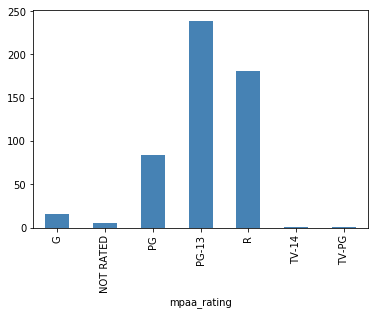

In [25]:
# Distribution by MPAA rating
counts_by_mpaa_rating = movies.groupby('mpaa_rating').count()['imdb_id']
counts_by_mpaa_rating.plot.bar(color='steelblue')
matplotlib.pyplot.show()

In [26]:
file.close()

### Get directors

In [27]:
directors = entities.query("entity_type == 'director'")
directors = directors.groupby('imdb_id')['entity_name'].apply(lambda x: '; '.join(x))
directors = directors.rename('directors').reset_index()

In [28]:
data = movies.merge(directors)
data = data[['imdb_id', 'title', 'release_year', 'directors']]
data = data.sort_values(data.columns.tolist())

In [29]:
data.tail()

,imdb_id,title,release_year,directors
525,tt5095030,Ant-Man and the Wasp,2018,Peyton Reed
526,tt5104604,Isle of Dogs,2018,Wes Anderson
527,tt5996252,Trader,1987,Michael Glyn
528,tt6540078,The Child in Time,2017,Julian Farino
529,tt7431894,Never Say Die,2017,Chiyu Zhang; Yang Song


In [30]:
data.to_csv('data/directors.csv', index=False)